In [17]:
#install.packages(c("ggplot2", "data.table"), dependencies=TRUE)
library(ggplot2)

source("./liblsb_scripts/utils.R")
source("./liblsb_scripts/stats.R")
source("./liblsb_scripts/aes.R")


Attaching package: ‘reshape2’

The following objects are masked from ‘package:data.table’:

    dcast, melt



In [21]:
data.benchmark <- read.table("./lsbdata/lsb.TimeAlgos.r0-1", header=TRUE)
names(data.benchmark)

[1] "Algorithm"   "Max_threads" "run"         "id"          "time"       
[6] "overhead"

In [37]:
res.benchmark_study <- CalculateDataSummary(data=data.benchmark, measurevar="time", groupvars=c("Algorithm", "Max_threads", "id"), conf.interval=.95, quantile.interval=.95)
res.selected <- subset(res.benchmark_study, id==100000)
head(res.selected)

,Algorithm,Max_threads,id,NumMeasures,min,max,mean,median,sum,StandardDev,Quantile.low,Quantile.high,CI.NNorm.low,CI.NNorm.high,StandardErr,CI.Norm.StudT,CI.Norm.Norm
4,parallel_sollin_AL,1,100000,5,11984900,14571218,13432659,13604427,67163295,1027465.03,12073640,14527141,14130449,12872301,459496.33,1275766.34,900596.26
8,parallel_sollin_AL,2,100000,5,8686145,9467431,9066140,8987677,45330698,301765.18,8711030,9446133,9254453,8934992,134953.49,374690.96,264503.98
12,parallel_sollin_AL,4,100000,5,5915051,6220366,6030398,6020979,30151992,115662.40,5920240,6201195,6028654,5966943,51725.80,143613.84,101380.70
16,parallel_sollin_EL,1,100000,5,8217668,8282136,8256630,8264232,41283151,28536.22,8219606,8282129,8282072,8237044,12761.78,35432.39,25012.64
20,parallel_sollin_EL,2,100000,5,7507599,7580837,7542597,7543678,37712984,30041.71,7508747,7578933,7561792,7519077,13435.06,37301.71,26332.24
24,parallel_sollin_EL,4,100000,5,7428724,7563220,7507339,7528151,37536695,55833.93,7432986,7561424,7545257,7471343,24969.69,69326.98,48939.70


In [38]:
summary.plot.labels <- unique(res.benchmark_study["Algorithm"])

Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

png 
  2

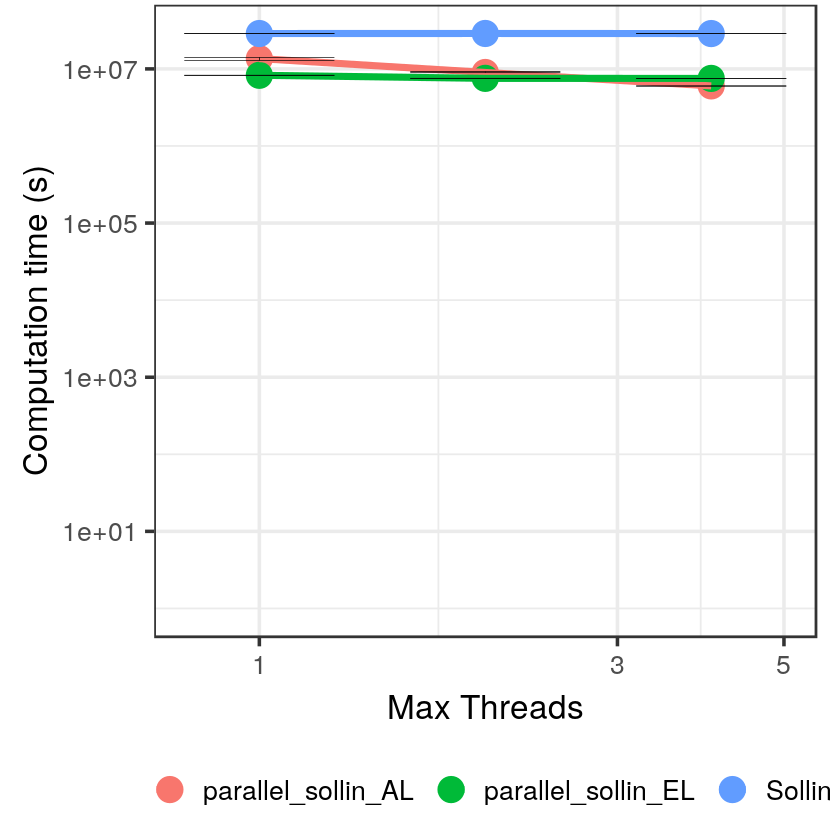

In [62]:
aes.var <- aes(x=Max_threads, y=median, ymin=CI.NNorm.high, ymax=CI.NNorm.low, color=factor(Algorithm))#, shape=factor(id))
plot_lat <- ggplot(data=res.selected, aes.var) +
      geom_point(size=na_geopoint_size)+  
      geom_line(size=na_geomline_size)+
      geom_errorbar(width = na_geom_errorbar_width, lwd=na_geom_errorbar_width, color="black")+
      scale_color_discrete(name="", labels=summary.plot.labels)+
      scale_shape_discrete(name="",labels=summary.plot.labels)+
      scale_x_log10(name="Max threads")+
      scale_y_log10(name="Computation time (s)", limits=c(1, max(res.benchmark_study["median"])))+
      theme_bw(na_theme_size) +
      theme(legend.position="bottom", legend.direction = "horizontal", legend.key = element_rect(fill = "transparent", colour = "transparent"), legend.background = element_rect(fill="transparent", colour="transparent")) + 
      theme(plot.margin=na_plot_margin) + theme(text = element_text(size=na_theme_text_size)) + theme(legend.key.height=na_theme_legend_key_height) +
      theme(axis.title.y=element_text(vjust=na_theme_y_vjust)) +
      theme(axis.title.x=element_text(vjust=na_theme_x_vjust))

print(plot_lat)

In [ ]:
PrintGGPlotOnPDF(plot_lat, "Results.pdf")